In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

import numpy as np
import seaborn as sns
import pandas as pd
import wandb

pd.set_option('display.max_columns', None)

In [3]:
api = wandb.Api()
entity, project = "invariance-learners", "icml2024"  # set to your entity and project 

In [4]:
# create dict mapping sweep name to sweep id
sweep_id_dict = {
    "gen_grid_mnist_sweep_000_50k_0": "2zzl6099",
    "gen_grid_mnist_sweep_000_50k_1": "t3pa3uhl",
    "gen_grid_mnist_sweep_000_50k_2": "4bg7mcjr",
    "gen_grid_mnist_sweep_000_37k5_0": "j0vnk1yl",
    "gen_grid_mnist_sweep_000_37k5_1": "zci5mpjo",
    "gen_grid_mnist_sweep_000_37k5_2": "qe49xn4b",
    "gen_grid_mnist_sweep_000_25k_0": "i5funz9j", 
    "gen_grid_mnist_sweep_000_25k_1": "rj4n44j5",
    "gen_grid_mnist_sweep_000_25k_2": "fkn9rb00",
    "gen_grid_dsprites_sweep_0": "e9lsc5wr", 
    "gen_grid_dsprites_sweep_1": "7viuzgx7",
    "gen_grid_dsprites_sweep_2": "mxchw69x",
}

In [5]:
summary_list, config_list, name_list, tags, ids, states, sweeps = [], [], [], [], [], [],  []

for sweep, sweep_id in sweep_id_dict.items():
    runs = api.sweep(entity + "/" + project + "/" + sweep_id).runs

    for run in runs: 
        # .summary contains the output keys/values for metrics like accuracy.
        #  We call ._json_dict to omit large files 
        summary_list.append(run.summary._json_dict)

        # .config contains the hyperparameters.
        #  We remove special values that start with _.
        config_list.append(
            {k: v for k,v in run.config.items()
            if not k.startswith('_')})

        # .name is the human-readable name of the run.
        name_list.append(run.name)

        tags.append(run.tags)

        ids.append(run.id)

        states.append(run.state)

        sweeps.append(sweep)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list,
    "tags": tags,
    "id": ids,
    "state": states,
    "sweep": sweeps,
    })

runs_df

,summary,config,name,tags,id,state,sweep
0,"{'valid/loss': -5.884126663208008, 'gen_plots_...","{'lr': 0.0003, 'seed': 0, 'angle': 0, 'model':...",ruby-sweep-288,[],064z4nu9,finished,gen_grid_mnist_sweep_000_50k_0
1,"{'_runtime': 478.6513276100158, 'train/mae': 0...","{'lr': 0.0003, 'seed': 0, 'angle': 0, 'model':...",summer-sweep-287,[],asyo2mjz,finished,gen_grid_mnist_sweep_000_50k_0
2,"{'train/loss': -6.2436065673828125, 'gen_plots...","{'lr': 0.0003, 'seed': 0, 'angle': 0, 'model':...",smooth-sweep-286,[],kc02faou,finished,gen_grid_mnist_sweep_000_50k_0
3,{'gen_rep_plots_1': {'path': 'media/images/gen...,"{'lr': 0.0003, 'seed': 0, 'angle': 0, 'model':...",swept-sweep-285,[],m5atf8g9,finished,gen_grid_mnist_sweep_000_50k_0
4,"{'inf_plots_0': {'height': 300, 'sha256': '4ac...","{'lr': 0.0003, 'seed': 0, 'angle': 0, 'model':...",apricot-sweep-284,[],vgiqa7fb,finished,gen_grid_mnist_sweep_000_50k_0
...,...,...,...,...,...,...,...
3451,"{'lr_gen': 0.0009000000427477062, 'valid/mae':...","{'lr': 0.003, 'seed': 2, 'model': {'num_bins':...",effortless-sweep-5,[],izfqeuhx,finished,gen_grid_dsprites_sweep_2
3452,"{'train/mae': 0.9640945196151732, 'gen_plots_1...","{'lr': 0.003, 'seed': 2, 'model': {'num_bins':...",fluent-sweep-2,[],c250ys5h,finished,gen_grid_dsprites_sweep_2
3453,"{'gen_plots_0': {'height': 300, 'sha256': 'd8c...","{'lr': 0.003, 'seed': 2, 'model': {'num_bins':...",devoted-sweep-4,[],ex18pvl2,finished,gen_grid_dsprites_sweep_2
3454,"{'train/log_p_η_x_hat': 7.390263557434082, 'ge...","{'lr': 0.003, 'seed': 2, 'model': {'num_bins':...",dashing-sweep-3,[],pykeeja6,finished,gen_grid_dsprites_sweep_2


In [6]:
df_expanded = runs_df.join(pd.json_normalize(runs_df['summary'], record_prefix='summary.').add_prefix('summary.')).drop('summary', axis='columns')
df_expanded = df_expanded.join(pd.json_normalize(runs_df['config'], record_prefix='config').add_prefix('config.')).drop('config', axis='columns')

df_expanded.columns

Index(['name', 'tags', 'id', 'state', 'sweep', 'summary.valid/loss',
       'summary.train/log_p_η_x_hat', 'summary._runtime',
       'summary.valid/log_p_η_x_hat', 'summary.valid/mae',
       ...
       'config.aug_dsprites.square_distribution.scale',
       'config.aug_dsprites.square_distribution.x_position',
       'config.aug_dsprites.square_distribution.y_position',
       'config.aug_dsprites.square_distribution.orientation',
       'config.aug_dsprites.square_distribution.unnormalised_shape_prob',
       'config.aug_dsprites.ellipse_distribution.scale',
       'config.aug_dsprites.ellipse_distribution.x_position',
       'config.aug_dsprites.ellipse_distribution.y_position',
       'config.aug_dsprites.ellipse_distribution.orientation',
       'config.aug_dsprites.ellipse_distribution.unnormalised_shape_prob'],
      dtype='object', length=165)

In [7]:
# take only completed runs
df_filtered = df_expanded[df_expanded['state'] != 'failed']

# take only runs with certain tags
# tags_to_keep = ['angle_sweep', 'num_trn_sweep', 'mnist', 'vae']
# df_filtered = df_filtered[df_filtered['tags'].apply(lambda x: all(tag in x for tag in tags_to_keep))]

# take only runs without certain tags
# tags_to_remove = ['test', 'hidden', 'ssilvae']
# df_filtered = df_filtered[~df_filtered['tags'].apply(lambda x: any(tag in x for tag in tags_to_remove))]

# replace nans in config.num_trn and config.angle with -1
df_filtered['config.num_trn'] = df_filtered['config.num_trn'].fillna(-1)
df_filtered['config.angle'] = df_filtered['config.angle'].fillna(0)

df_filtered

,name,tags,id,state,sweep,summary.valid/loss,summary.train/log_p_η_x_hat,summary._runtime,summary.valid/log_p_η_x_hat,summary.valid/mae,summary.lr_gen,summary._timestamp,summary._step,summary.grad_norm,summary.train/mae,summary.train/loss,summary.gen_plots_2.sha256,summary.gen_plots_2.path,summary.gen_plots_2.size,summary.gen_plots_2._type,summary.gen_plots_2.width,summary.gen_plots_2.format,summary.gen_plots_2.height,summary.gen_plots_3.path,summary.gen_plots_3.size,summary.gen_plots_3._type,summary.gen_plots_3.width,summary.gen_plots_3.format,summary.gen_plots_3.height,summary.gen_plots_3.sha256,summary.inf_plots_0.format,summary.inf_plots_0.height,summary.inf_plots_0.sha256,summary.inf_plots_0.path,summary.inf_plots_0.size,summary.inf_plots_0._type,summary.inf_plots_0.width,summary.gen_plots_0.size,summary.gen_plots_0._type,summary.gen_plots_0.width,summary.gen_plots_0.format,summary.gen_plots_0.height,summary.gen_plots_0.sha256,summary.gen_plots_0.path,summary.gen_rep_plots_2.height,summary.gen_rep_plots_2.sha256,summary.gen_rep_plots_2.path,summary.gen_rep_plots_2.size,summary.gen_rep_plots_2._type,summary.gen_rep_plots_2.width,summary.gen_rep_plots_2.format,summary.inf_plots_2.height,summary.inf_plots_2.sha256,summary.inf_plots_2.path,summary.inf_plots_2.size,summary.inf_plots_2._type,summary.inf_plots_2.width,summary.inf_plots_2.format,summary.inf_plots_3.size,summary.inf_plots_3._type,summary.inf_plots_3.width,summary.inf_plots_3.format,summary.inf_plots_3.height,summary.inf_plots_3.sha256,summary.inf_plots_3.path,summary.gen_training_metrics.height,summary.gen_training_metrics.sha256,summary.gen_training_metrics.path,summary.gen_training_metrics.size,summary.gen_training_metrics._type,summary.gen_training_metrics.width,summary.gen_training_metrics.format,summary.gen_plots_4.height,summary.gen_plots_4.sha256,summary.gen_plots_4.path,summary.gen_plots_4.size,summary.gen_plots_4._type,summary.gen_plots_4.width,summary.gen_plots_4.format,summary._wandb.runtime,summary.gen_plots_1.format,summary.gen_plots_1.height,summary.gen_plots_1.sha256,summary.gen_plots_1.path,summary.gen_plots_1.size,summary.gen_plots_1._type,summary.gen_plots_1.width,summary.inf_plots_1.sha256,summary.inf_plots_1.path,summary.inf_plots_1.size,summary.inf_plots_1._type,summary.inf_plots_1.width,summary.inf_plots_1.format,summary.inf_plots_1.height,summary.inf_plots_4.path,summary.inf_plots_4.size,summary.inf_plots_4._type,summary.inf_plots_4.width,summary.inf_plots_4.format,summary.inf_plots_4.height,summary.inf_plots_4.sha256,summary.gen_rep_plots_0.width,summary.gen_rep_plots_0.format,summary.gen_rep_plots_0.height,summary.gen_rep_plots_0.sha256,summary.gen_rep_plots_0.path,summary.gen_rep_plots_0.size,summary.gen_rep_plots_0._type,summary.gen_rep_plots_1.path,summary.gen_rep_plots_1.size,summary.gen_rep_plots_1._type,summary.gen_rep_plots_1.width,summary.gen_rep_plots_1.format,summary.gen_rep_plots_1.height,summary.gen_rep_plots_1.sha256,config.lr,config.seed,config.angle,config.steps,config.dataset,config.num_trn,config.num_val,config.pp_eval,config.shuffle,config.pp_train,config.clip_norm,config.eval_freq,config.n_samples,config.val_split,config.batch_size,config.model_name,config.train_split,config.init_lr_mult,config.weight_decay,config.final_lr_mult,config.mae_loss_mult,config.augment_bounds,config.augment_offset,config.translate_last,config.warmup_steps_pct,config.interpolation_order,config.shuffle_buffer_size,config.repeat_after_batching,config.model.num_bins,config.model.num_flows,config.model.conditioner.hidden_dims,config.model.conditioner.dropout_rate,config.model.hidden_dims,config.model.dropout_rate,config.model.squash_to_bounds,config.aug_dsprites.heart_distribution.scale,config.aug_dsprites.heart_distribution.x_position,config.aug_dsprites.heart_distribution.y_position,config.aug_dsprites.heart_distribution.orientation,config.aug_dsprites.heart_distribution.unnormalised_shape_prob,config.aug_dsprites.square_distribution.scale,config

In [8]:
df_filtered['config.angle'].unique()

array([0.])

In [9]:
df_filtered['config.steps'].unique()

array([60000, 30000, 15000,  7500])

In [10]:
df_filtered['config.num_trn'].unique()

array([ 5.00e+04,  3.75e+04,  2.50e+04, -1.00e+00])

In [11]:
df_filtered['config.dataset'].unique()

array(['MNIST', 'aug_dsprites'], dtype=object)

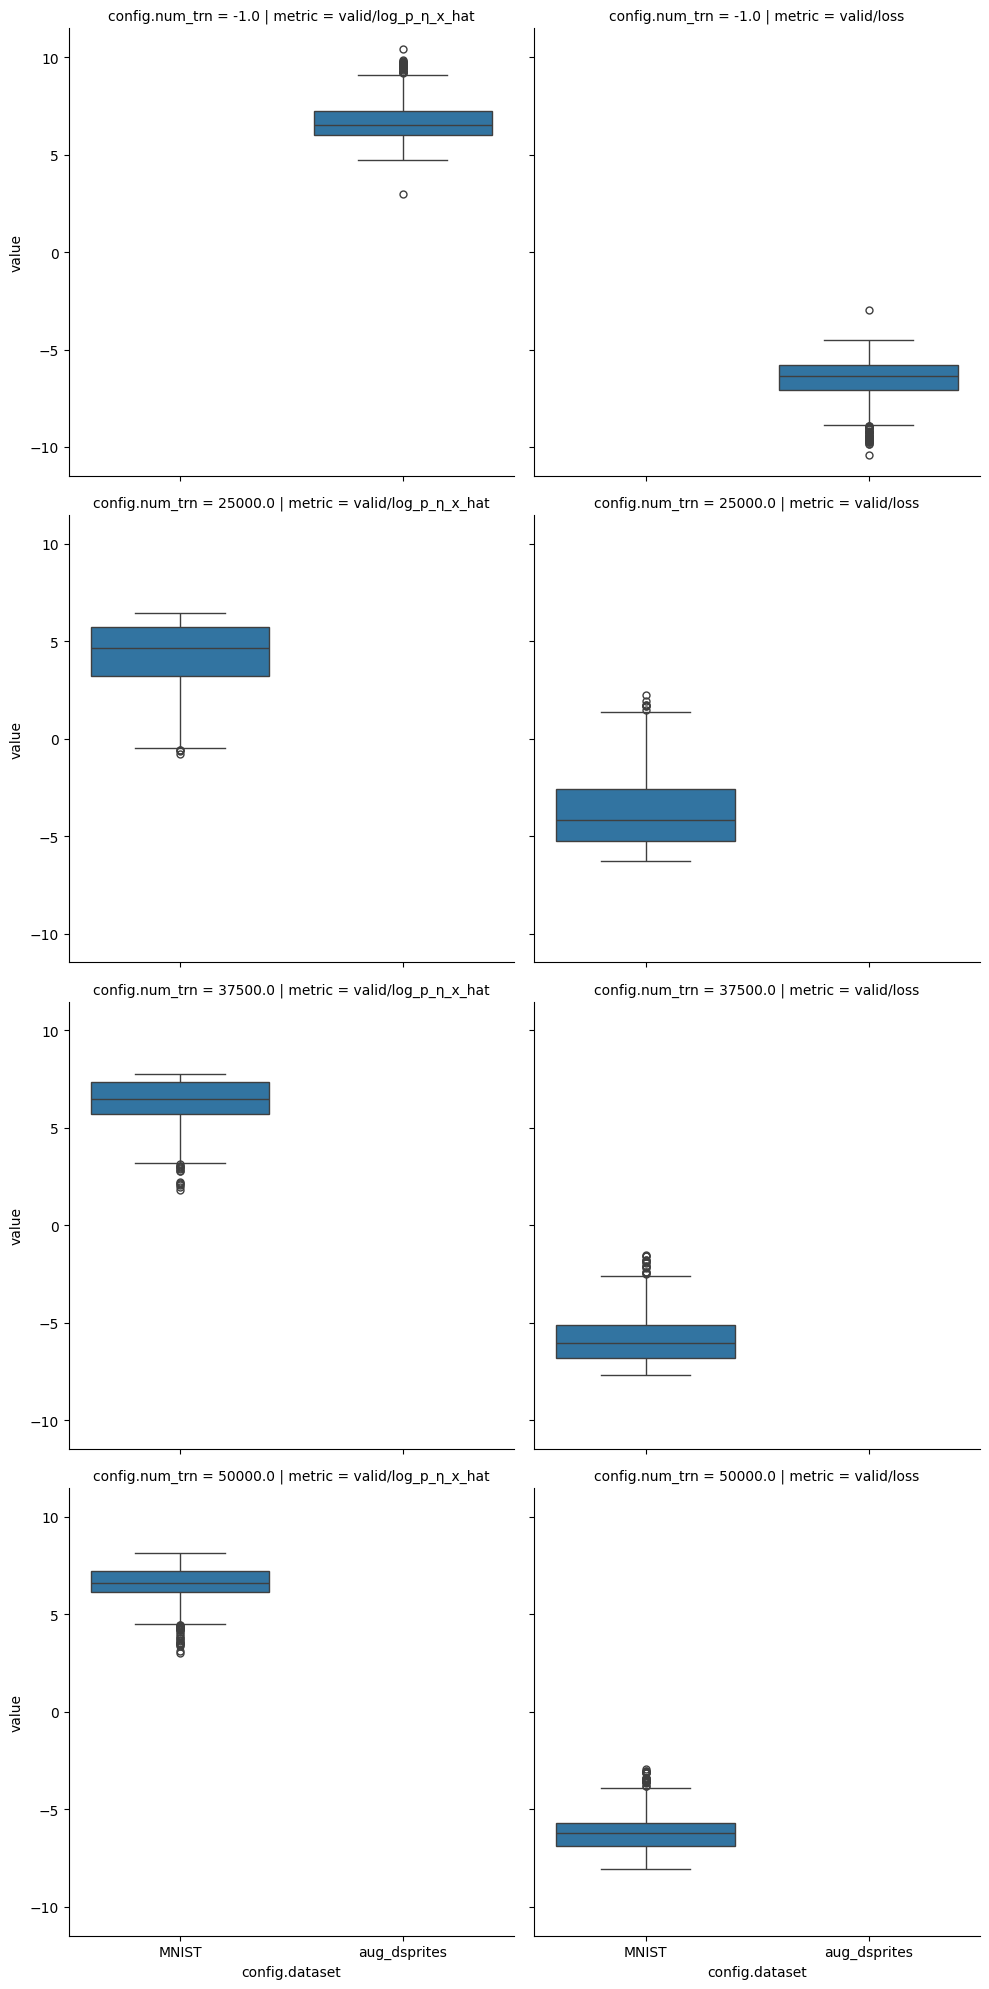

In [12]:
plot_df = df_filtered[[
    'summary.valid/log_p_η_x_hat', 'summary.valid/loss', 'config.angle',  'config.num_trn', 'config.dataset'
]]

# take only some settings
# plot_df = plot_df[
#     plot_df['config.init_lr'].isin([0.0003])
# ]

# pivot the data frame so that each of metrics is a column, and the values are the corresponding values
plot_df = plot_df.melt(
    id_vars=['config.angle', 'config.num_trn', 'config.dataset'],
    value_vars=['summary.valid/log_p_η_x_hat', 'summary.valid/loss'],
    var_name='metric',
    value_name='value'
)

# remove the 'summary.' prefix from the metric names
plot_df['metric'] = plot_df['metric'].str.replace('summary.', '')


sns.catplot(data=plot_df, x="config.dataset", y="value", col="metric", row='config.num_trn', kind="box", showfliers=True, sharey=True)

In [13]:
hyper_names = ['config.' + x for x in [
    'final_lr_mult', 'lr', 'mae_loss_mult',
    'model.dropout_rate', 'model.num_flows', 'steps',
]]

In [14]:
for name in hyper_names:
    df_filtered[name] = df_filtered[name].astype(str)

## Analize sweeps

In [15]:
df_filtered

,name,tags,id,state,sweep,summary.valid/loss,summary.train/log_p_η_x_hat,summary._runtime,summary.valid/log_p_η_x_hat,summary.valid/mae,summary.lr_gen,summary._timestamp,summary._step,summary.grad_norm,summary.train/mae,summary.train/loss,summary.gen_plots_2.sha256,summary.gen_plots_2.path,summary.gen_plots_2.size,summary.gen_plots_2._type,summary.gen_plots_2.width,summary.gen_plots_2.format,summary.gen_plots_2.height,summary.gen_plots_3.path,summary.gen_plots_3.size,summary.gen_plots_3._type,summary.gen_plots_3.width,summary.gen_plots_3.format,summary.gen_plots_3.height,summary.gen_plots_3.sha256,summary.inf_plots_0.format,summary.inf_plots_0.height,summary.inf_plots_0.sha256,summary.inf_plots_0.path,summary.inf_plots_0.size,summary.inf_plots_0._type,summary.inf_plots_0.width,summary.gen_plots_0.size,summary.gen_plots_0._type,summary.gen_plots_0.width,summary.gen_plots_0.format,summary.gen_plots_0.height,summary.gen_plots_0.sha256,summary.gen_plots_0.path,summary.gen_rep_plots_2.height,summary.gen_rep_plots_2.sha256,summary.gen_rep_plots_2.path,summary.gen_rep_plots_2.size,summary.gen_rep_plots_2._type,summary.gen_rep_plots_2.width,summary.gen_rep_plots_2.format,summary.inf_plots_2.height,summary.inf_plots_2.sha256,summary.inf_plots_2.path,summary.inf_plots_2.size,summary.inf_plots_2._type,summary.inf_plots_2.width,summary.inf_plots_2.format,summary.inf_plots_3.size,summary.inf_plots_3._type,summary.inf_plots_3.width,summary.inf_plots_3.format,summary.inf_plots_3.height,summary.inf_plots_3.sha256,summary.inf_plots_3.path,summary.gen_training_metrics.height,summary.gen_training_metrics.sha256,summary.gen_training_metrics.path,summary.gen_training_metrics.size,summary.gen_training_metrics._type,summary.gen_training_metrics.width,summary.gen_training_metrics.format,summary.gen_plots_4.height,summary.gen_plots_4.sha256,summary.gen_plots_4.path,summary.gen_plots_4.size,summary.gen_plots_4._type,summary.gen_plots_4.width,summary.gen_plots_4.format,summary._wandb.runtime,summary.gen_plots_1.format,summary.gen_plots_1.height,summary.gen_plots_1.sha256,summary.gen_plots_1.path,summary.gen_plots_1.size,summary.gen_plots_1._type,summary.gen_plots_1.width,summary.inf_plots_1.sha256,summary.inf_plots_1.path,summary.inf_plots_1.size,summary.inf_plots_1._type,summary.inf_plots_1.width,summary.inf_plots_1.format,summary.inf_plots_1.height,summary.inf_plots_4.path,summary.inf_plots_4.size,summary.inf_plots_4._type,summary.inf_plots_4.width,summary.inf_plots_4.format,summary.inf_plots_4.height,summary.inf_plots_4.sha256,summary.gen_rep_plots_0.width,summary.gen_rep_plots_0.format,summary.gen_rep_plots_0.height,summary.gen_rep_plots_0.sha256,summary.gen_rep_plots_0.path,summary.gen_rep_plots_0.size,summary.gen_rep_plots_0._type,summary.gen_rep_plots_1.path,summary.gen_rep_plots_1.size,summary.gen_rep_plots_1._type,summary.gen_rep_plots_1.width,summary.gen_rep_plots_1.format,summary.gen_rep_plots_1.height,summary.gen_rep_plots_1.sha256,config.lr,config.seed,config.angle,config.steps,config.dataset,config.num_trn,config.num_val,config.pp_eval,config.shuffle,config.pp_train,config.clip_norm,config.eval_freq,config.n_samples,config.val_split,config.batch_size,config.model_name,config.train_split,config.init_lr_mult,config.weight_decay,config.final_lr_mult,config.mae_loss_mult,config.augment_bounds,config.augment_offset,config.translate_last,config.warmup_steps_pct,config.interpolation_order,config.shuffle_buffer_size,config.repeat_after_batching,config.model.num_bins,config.model.num_flows,config.model.conditioner.hidden_dims,config.model.conditioner.dropout_rate,config.model.hidden_dims,config.model.dropout_rate,config.model.squash_to_bounds,config.aug_dsprites.heart_distribution.scale,config.aug_dsprites.heart_distribution.x_position,config.aug_dsprites.heart_distribution.y_position,config.aug_dsprites.heart_distribution.orientation,config.aug_dsprites.heart_distribution.unnormalised_shape_prob,config.aug_dsprites.square_distribution.scale,config

In [16]:
# pivot the data frame so that each of 'summary.valid/log_p_η_x_hat', 'summary.valid/loss',
# is a column, and the values are the corresponding values
df = df_filtered.melt(
    id_vars=['config.angle', 'config.num_trn', 'config.dataset', 'config.seed'] + hyper_names,
    value_vars=['summary.valid/log_p_η_x_hat', 'summary.valid/loss', 'summary.valid/mae'],
    var_name='metric',
    value_name='value'
)

df

,config.angle,config.num_trn,config.dataset,config.seed,config.final_lr_mult,config.lr,config.mae_loss_mult,config.model.dropout_rate,config.model.num_flows,config.steps,metric,value
0,0.0,50000.0,MNIST,0,0.03,0.0003,1,0.2,6,60000,summary.valid/log_p_η_x_hat,6.678086
1,0.0,50000.0,MNIST,0,0.03,0.0003,1,0.2,6,30000,summary.valid/log_p_η_x_hat,6.658040
2,0.0,50000.0,MNIST,0,0.03,0.0003,1,0.2,6,15000,summary.valid/log_p_η_x_hat,6.554315
3,0.0,50000.0,MNIST,0,0.03,0.0003,1,0.2,6,7500,summary.valid/log_p_η_x_hat,6.261288
4,0.0,50000.0,MNIST,0,0.03,0.0003,1,0.2,5,60000,summary.valid/log_p_η_x_hat,6.631589
...,...,...,...,...,...,...,...,...,...,...,...,...
10363,0.0,-1.0,aug_dsprites,2,0.3,0.003,0,0.05,5,7500,summary.valid/mae,0.579818
10364,0.0,-1.0,aug_dsprites,2,0.3,0.003,0,0.05,4,15000,summary.valid/mae,0.682421
10365,0.0,-1.0,aug_dsprites,2,0.3,0.003,0,0.05,4,60000,summary.valid/mae,1.193766
10366,0.0,-1.0,aug_dsprites,2,0.3,0.003,0,0.05,4,30000,summary.valid/mae,0.982984


In [17]:
METRIC = 'summary.valid/log_p_η_x_hat'

In [18]:
hyper_names

['config.final_lr_mult',
 'config.lr',
 'config.mae_loss_mult',
 'config.model.dropout_rate',
 'config.model.num_flows',
 'config.steps']

In [19]:
best_df = df[df.metric == METRIC].set_index(list(set(hyper_names) - set(['config.mae_loss_mult']))).groupby(['config.dataset', 'config.num_trn', 'config.seed', 'config.mae_loss_mult'])['value'].nlargest(1).reset_index().set_index(['config.dataset', 'config.num_trn', 'config.seed', 'config.mae_loss_mult'])
best_df

config.model.dropout_rate  \
config.dataset config.num_trn config.seed config.mae_loss_mult                             
MNIST           25000.0       0           0                                          0.2   
                                          1                                          0.2   
                              1           0                                          0.2   
                                          1                                          0.2   
                              2           0                                          0.2   
                                          1                                          0.2   
                37500.0       0           0                                          0.2   
                                          1                                          0.2   
                              1           0                                          0.2   
                                          1                                          0.2   
                              2           0                                          0.2   
                                          1                                          0.2   
                50000.0       0           0                                          0.2   
                                          1                                          0.2   
                              1           0                                          0.2   
                                          1                                          0.2   
                              2           0                                          0.2   
                                          1                                          0.2   
aug_dsprites   -1.0           0           0                                         0.05   
                                          1                                         0.05   
                              1           0                                         0.05   
                                          1                                         0.05   
                              2           0                                         0.05   
                                          1                                         0.05   

                                                               config.final_lr_mult  \
config.dataset config.num_trn config.seed config.mae_loss_mult                        
MNIST           25000.0       0           0                                    0.03   
                                          1                                    0.03   
                              1           0                                    0.03   
                                          1                                    0.03   
                              2           0                                    0.03   
                                          1                                    0.03   
                37500.0       0           0                                    0.03   
                                          1                                    0.03   
                              1           0                                    0.03   
                                          1                                    0.03   
                              2           0                                    0.03   
                                          1                                    0.03   
                50000.0       0           0                                    0.03   
                                          1                                    0.03   
                              1           0                                    0.03   
                                          1                                    0.03   
                              2           0                                    0.03   
                 

In [20]:
df[df.metric == METRIC].set_index(hyper_names).groupby(['config.dataset', 'config.num_trn', 'config.seed',])['value'].nlargest(3).reset_index().set_index(['config.dataset', 'config.num_trn', 'config.seed',])

config.final_lr_mult config.lr  \
config.dataset config.num_trn config.seed                                  
MNIST           25000.0       0                           0.03     0.003   
                              0                           0.03     0.003   
                              0                           0.03     0.003   
                              1                           0.03     0.003   
                              1                           0.03     0.003   
                              1                           0.03     0.003   
                              2                           0.03     0.003   
                              2                           0.03     0.003   
                              2                           0.03     0.003   
                37500.0       0                           0.03    0.0003   
                              0                            0.3    0.0003   
                              0                           0.03     0.003   
                              1                           0.03     0.003   
                              1                           0.03     0.003   
                              1                            0.3     0.003   
                              2                           0.03     0.003   
                              2                           0.03     0.003   
                              2                           0.03     0.003   
                50000.0       0                           0.03     0.003   
                              0                           0.03     0.003   
                              0                            0.3     0.003   
                              1                           0.03     0.003   
                              1                           0.03     0.003   
                              1                           0.03    0.0003   
                              2                           0.03     0.003   
                              2                            0.3     0.003   
                              2                           0.03     0.003   
aug_dsprites   -1.0           0                            0.3     0.003   
                              0                            0.3    0.0003   
                              0                           0.03     0.003   
                              1                           0.03    0.0003   
                              1                           0.03    0.0003   
                              1                            0.3    0.0003   
                              2                            0.3    0.0003   
                              2                           0.03    0.0003   
                              2                            0.3    0.0003   

                                          config.mae_loss_mult  \
config.dataset config.num_trn config.seed                        
MNIST           25000.0       0                              1   
                              0                              1   
                              0                              1   
                              1                              1   
                              1                              1   
                              1                              1   
                              2                              1   
                              2                              1   
                              2                              1   
                37500.0       0                              1   
                              0                              1   
                              0                              1   
                              1                              1   
                              1                              1   
                              1                              1   
                              2

In [23]:
df[(df.metric == METRIC) & (df['config.mae_loss_mult'] == '1')].groupby(
    ['config.dataset', 'config.num_trn'] + hyper_names
    )['value'].mean().reset_index().set_index(hyper_names
    ).groupby(['config.dataset', 'config.num_trn',])['value'].nlargest(3
    ).reset_index().set_index(['config.dataset', 'config.num_trn',])

config.final_lr_mult config.lr  \
config.dataset config.num_trn                                  
MNIST           25000.0                       0.03     0.003   
                25000.0                       0.03     0.003   
                25000.0                       0.03     0.003   
                37500.0                       0.03     0.003   
                37500.0                       0.03    0.0003   
                37500.0                       0.03     0.003   
                50000.0                       0.03     0.003   
                50000.0                       0.03     0.003   
                50000.0                        0.3     0.003   
aug_dsprites   -1.0                            0.3    0.0003   
               -1.0                           0.03    0.0003   
               -1.0                           0.03    0.0003   

                              config.mae_loss_mult config.model.dropout_rate  \
config.dataset config.num_trn                                                  
MNIST           25000.0                          1                       0.2   
                25000.0                          1                       0.2   
                25000.0                          1                       0.2   
                37500.0                          1                       0.2   
                37500.0                          1                       0.2   
                37500.0                          1                       0.2   
                50000.0                          1                       0.2   
                50000.0                          1                       0.2   
                50000.0                          1                       0.2   
aug_dsprites   -1.0                              1                      0.05   
               -1.0                              1                      0.05   
               -1.0                              1                      0.05   

                              config.model.num_flows config.steps     value  
config.dataset config.num_trn                                                
MNIST           25000.0                            6         7500  6.354586  
                25000.0                            5         7500  6.335965  
                25000.0                            5        15000  6.317689  
                37500.0                            6        30000  7.375332  
                37500.0                            6        15000  7.363238  
                37500.0                            5        30000  7.358284  
                50000.0                            6        60000  7.334723  
                50000.0                            5        60000  7.311068  
                50000.0                            6        60000  7.285979  
aug_dsprites   -1.0                                6        60000  8.271403  
               -1.0                                6        60000  8.046331  
               -1.0                                5        60000  7.887930

In [25]:
hyper_names

['config.final_lr_mult',
 'config.lr',
 'config.mae_loss_mult',
 'config.model.dropout_rate',
 'config.model.num_flows',
 'config.steps']

### final_lr_mult

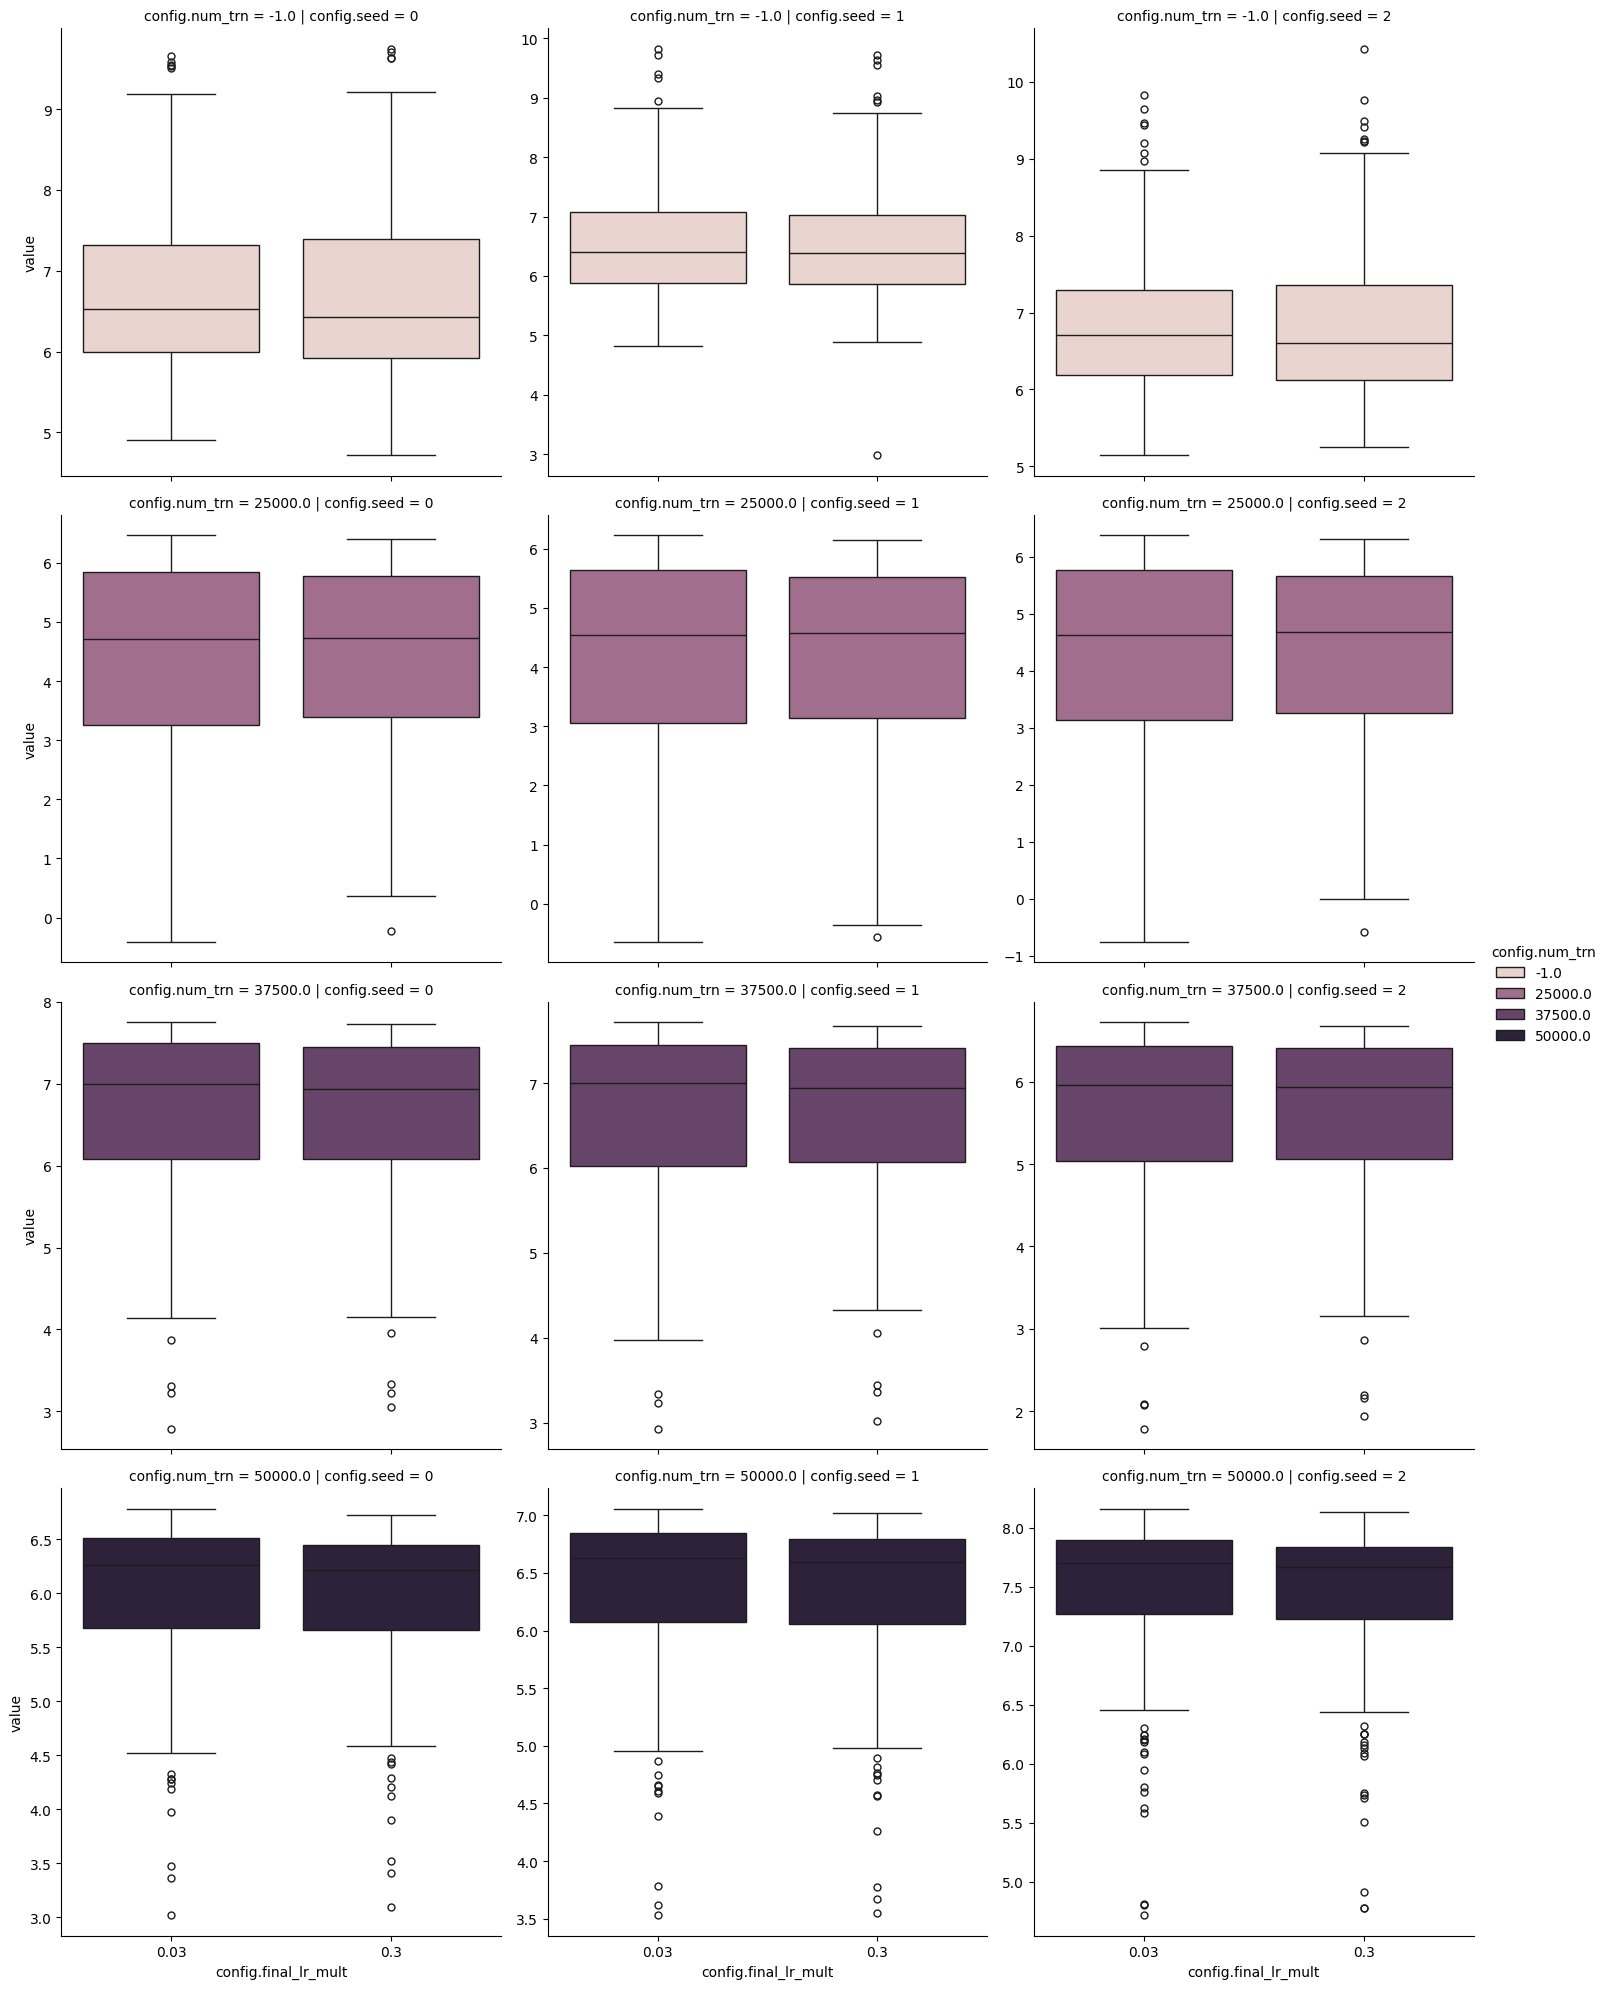

In [46]:
g = sns.catplot(
    data=df[df.metric == METRIC],
    x="config.final_lr_mult",
    y="value",
    row="config.num_trn", hue='config.num_trn', col='config.seed',
    kind="box",
    sharex=True, sharey=False,
)

# g.set(yscale="log")

g

### lr

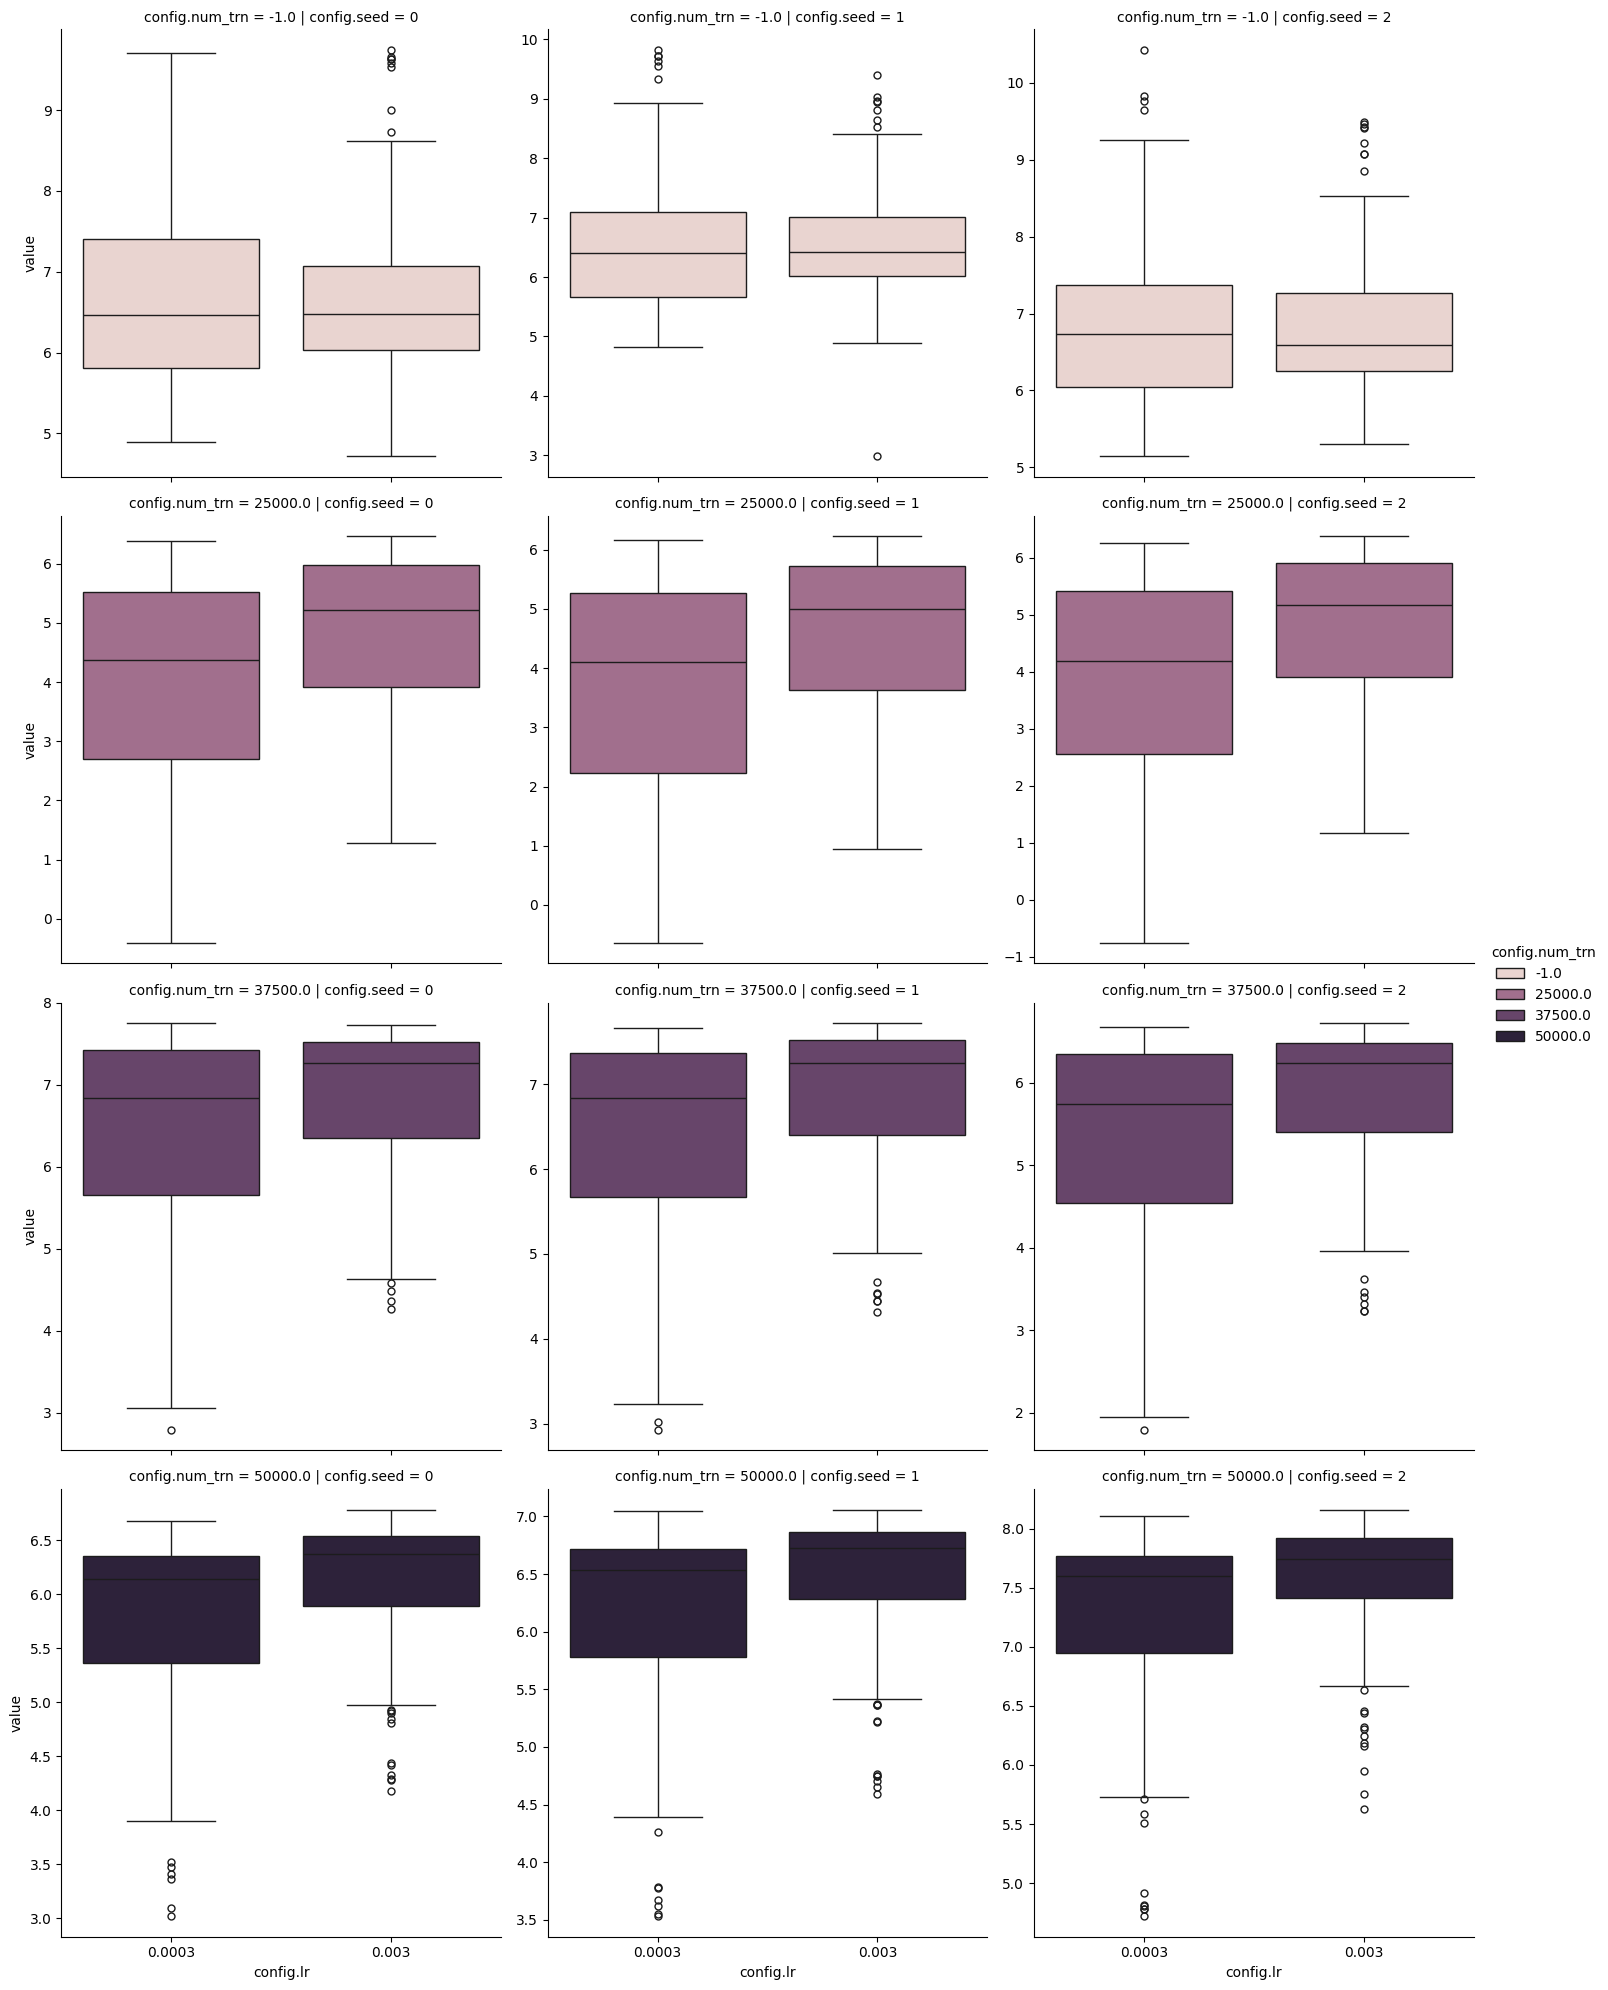

In [45]:
g = sns.catplot(
    data=df[df.metric == METRIC],
    x="config.lr",
    y="value",
    row="config.num_trn", hue='config.num_trn', col='config.seed',
    kind="box",
    sharex=True, sharey=False,
)

# g.set(yscale="log")

g

### mae_loss_mult

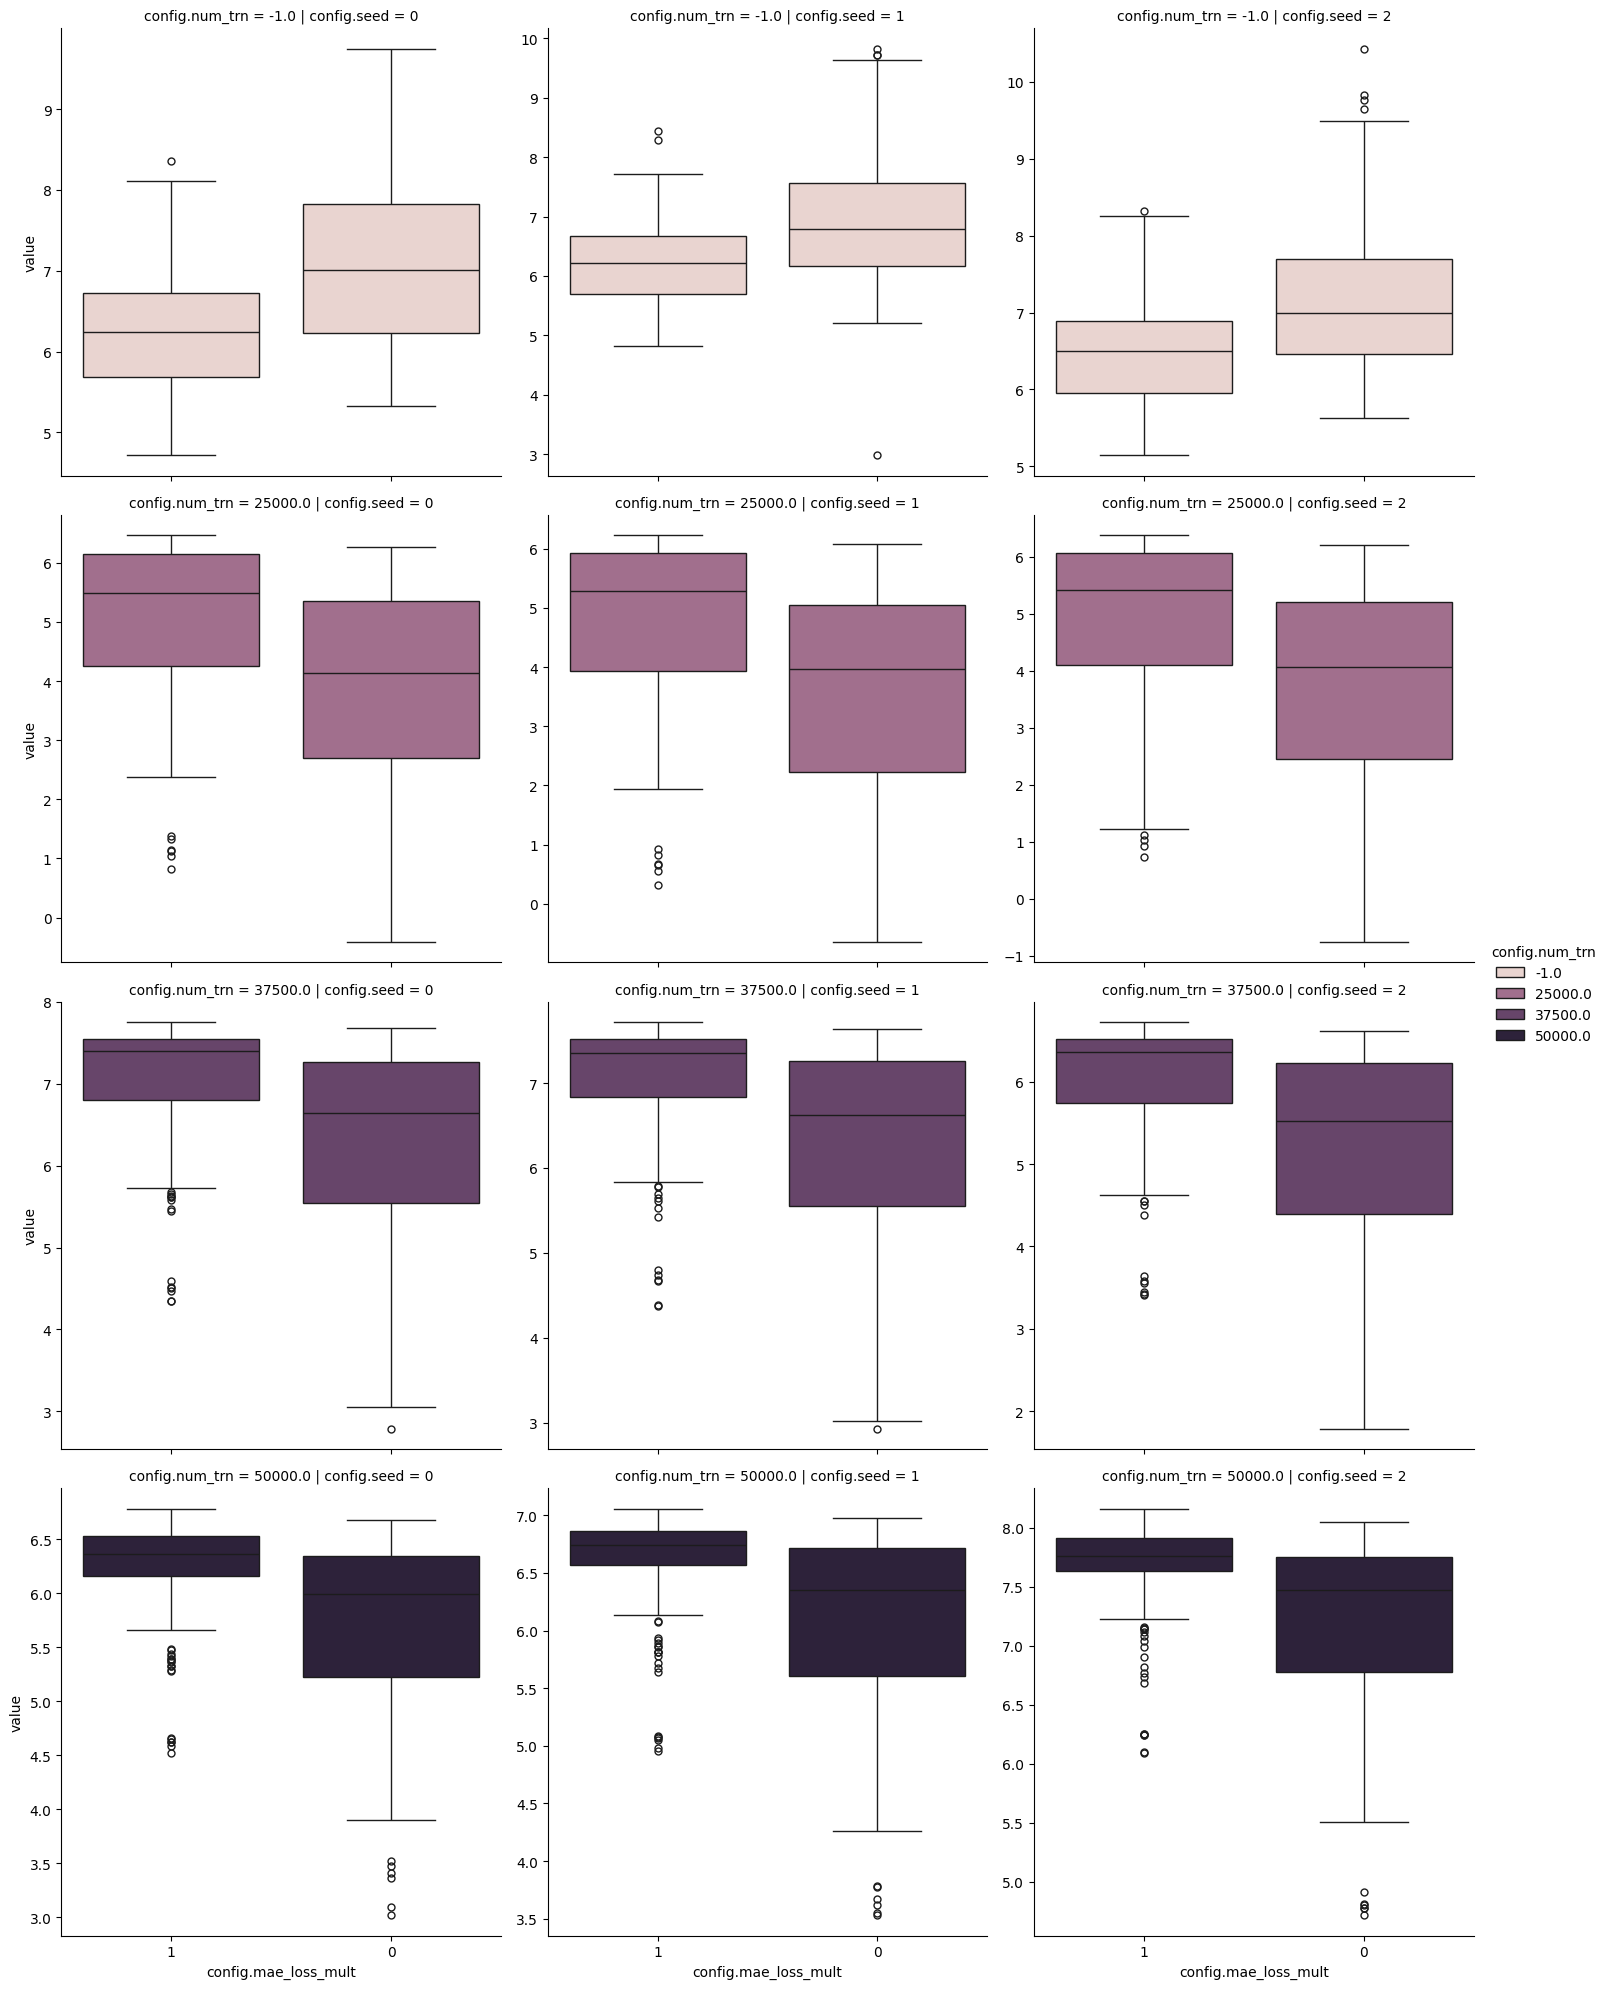

In [42]:
g = sns.catplot(
    data=df[df.metric == METRIC],
    x="config.mae_loss_mult",
    y="value",
    row="config.num_trn", hue='config.num_trn', col='config.seed',
    kind="box",
    sharex=True, sharey=False,
)

# g.set(yscale="log")

g

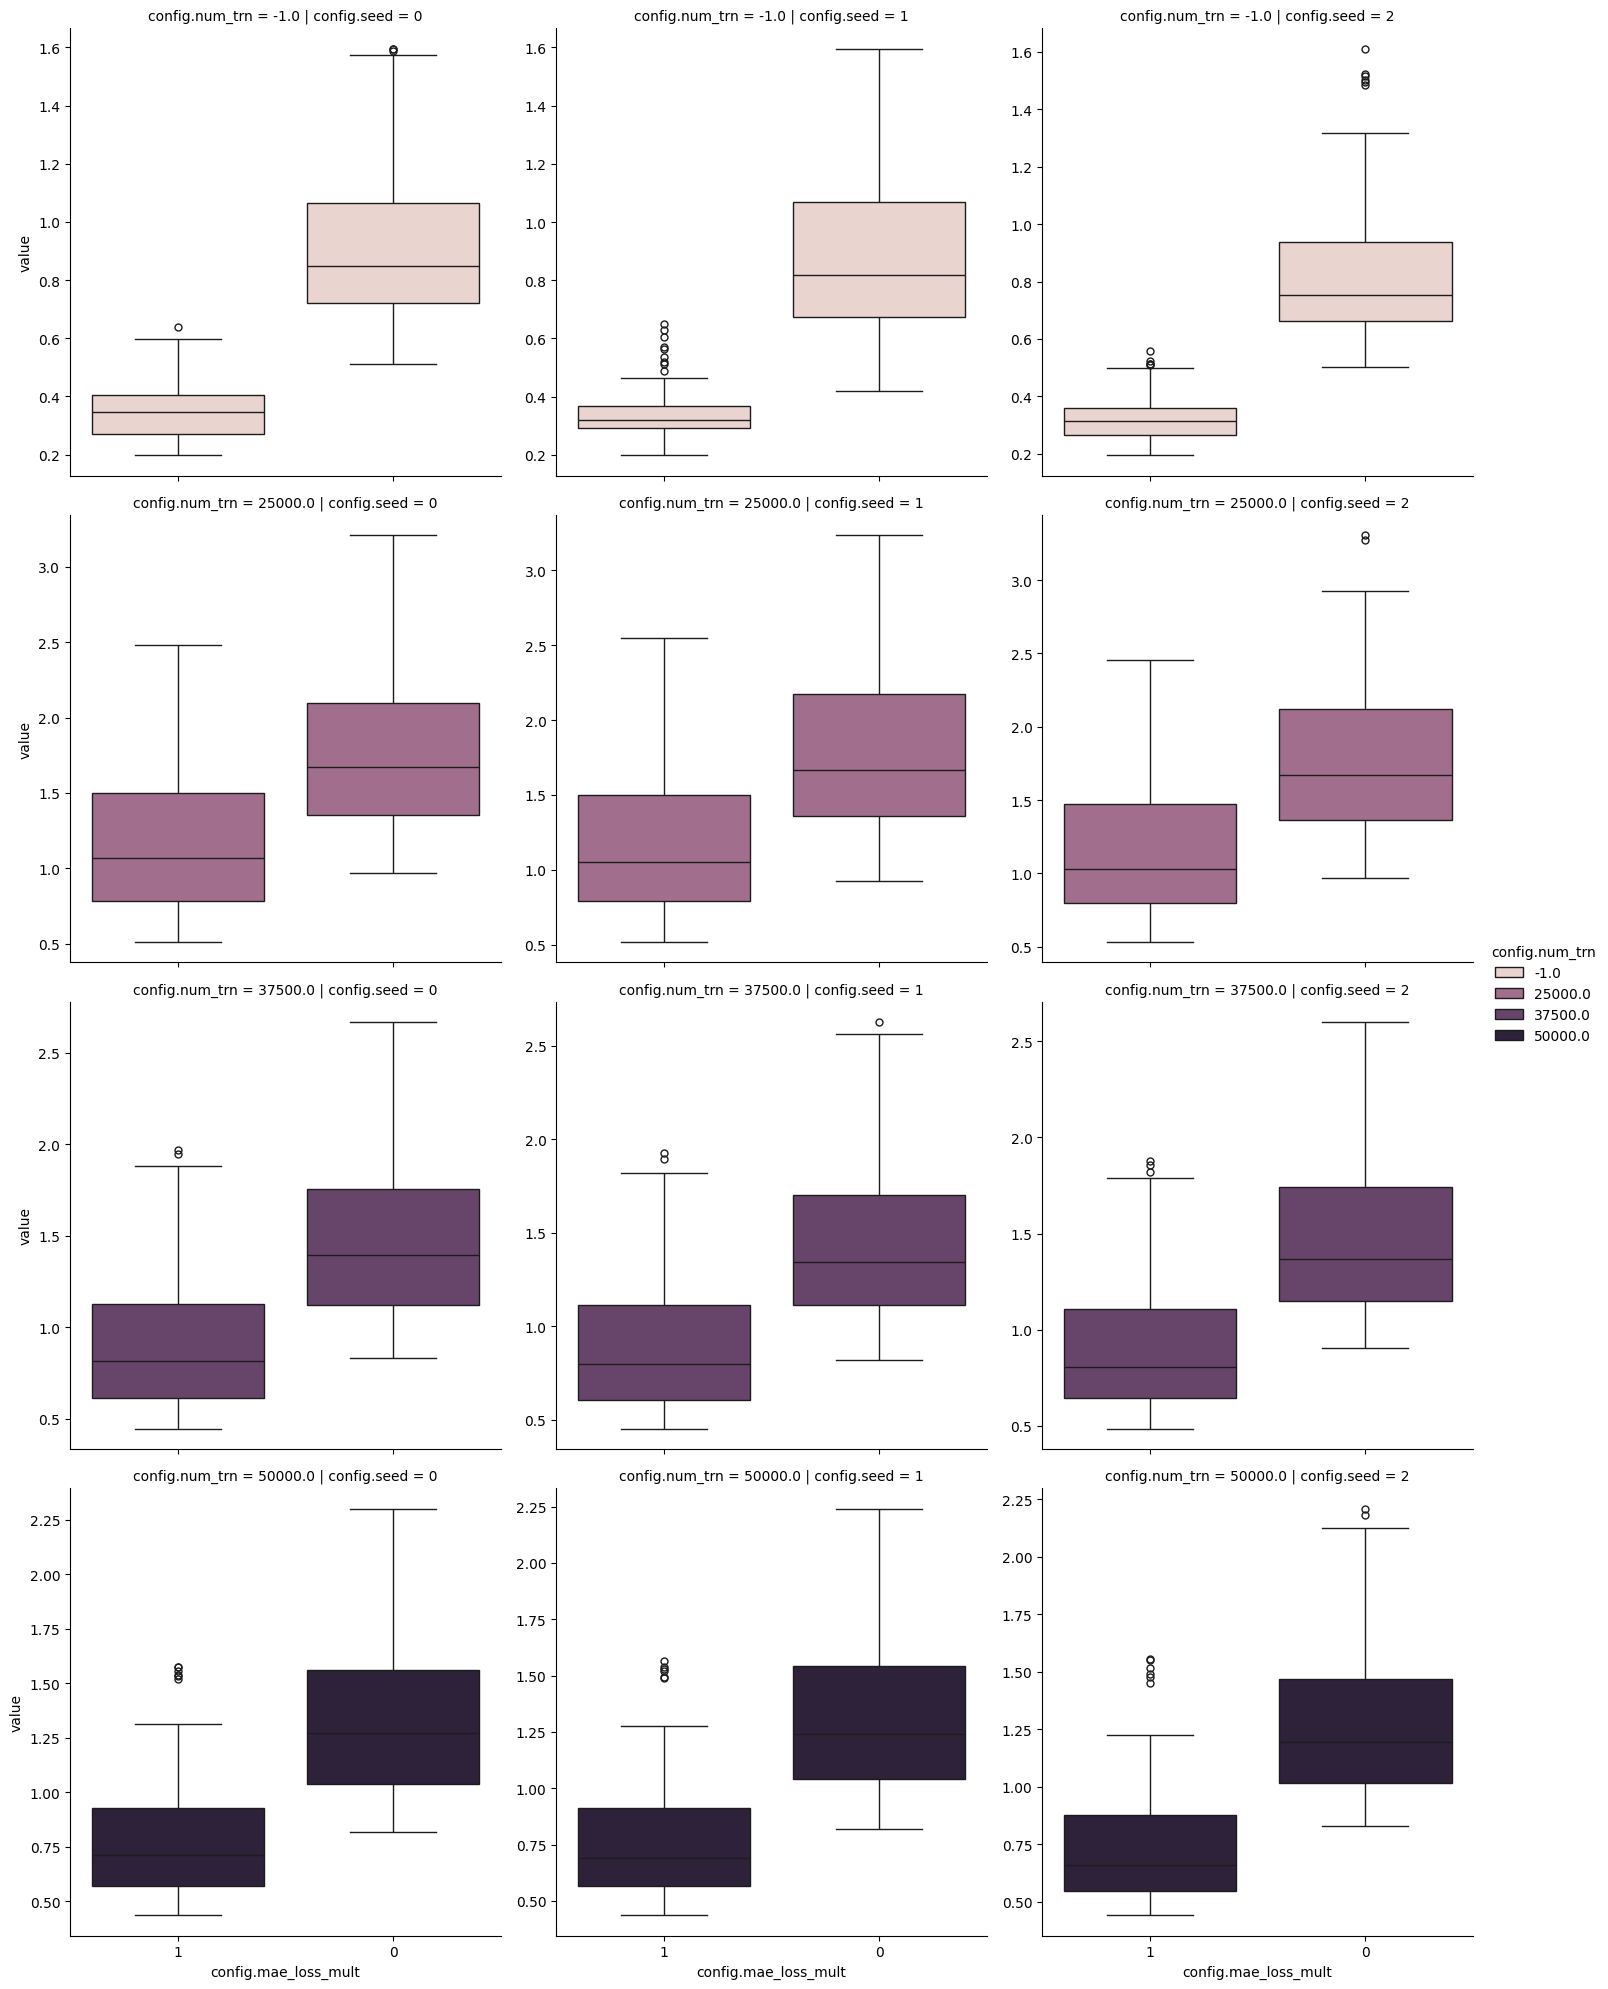

In [44]:
g = sns.catplot(
    data=df[df.metric == 'summary.valid/mae'],
    x="config.mae_loss_mult",
    y="value",
    row="config.num_trn", hue='config.num_trn', col='config.seed',
    kind="box",
    sharex=True, sharey=False,
)

# g.set(yscale="log")

g

### model.dropout_rate

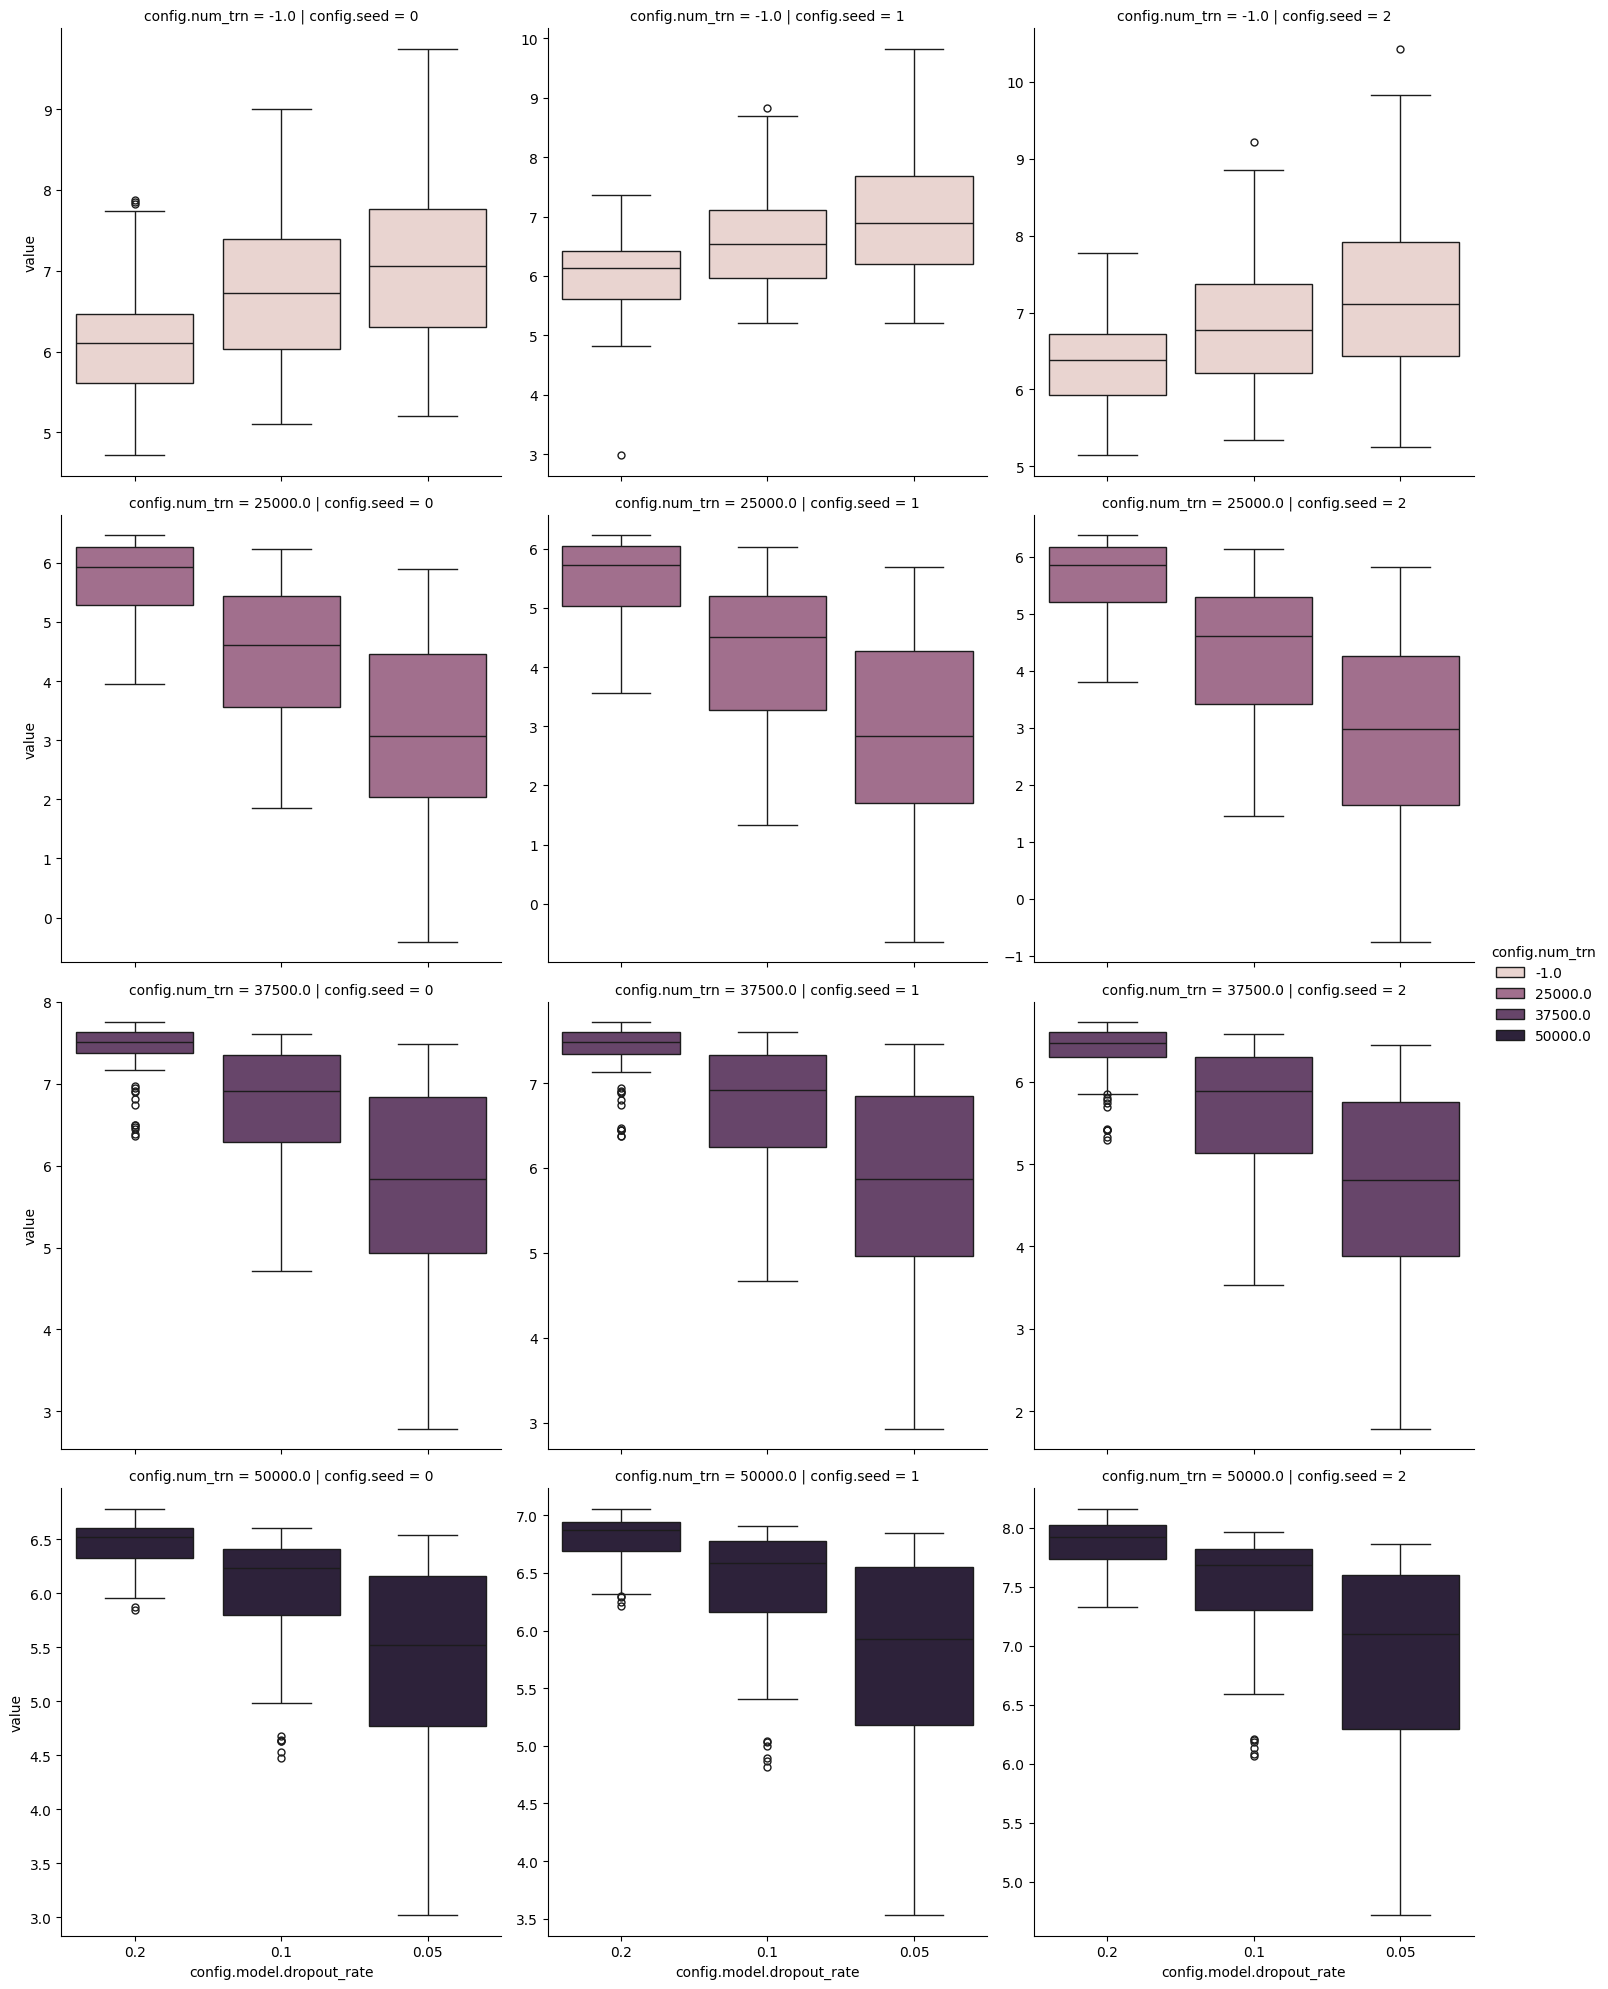

In [41]:
g = sns.catplot(
    data=df[df.metric == METRIC],
    x="config.model.dropout_rate",
    y="value",
    row="config.num_trn", hue='config.num_trn', col='config.seed',
    kind="box",
    sharex=True, sharey=False,
)

# g.set(yscale="log")

g

### model.num_flows

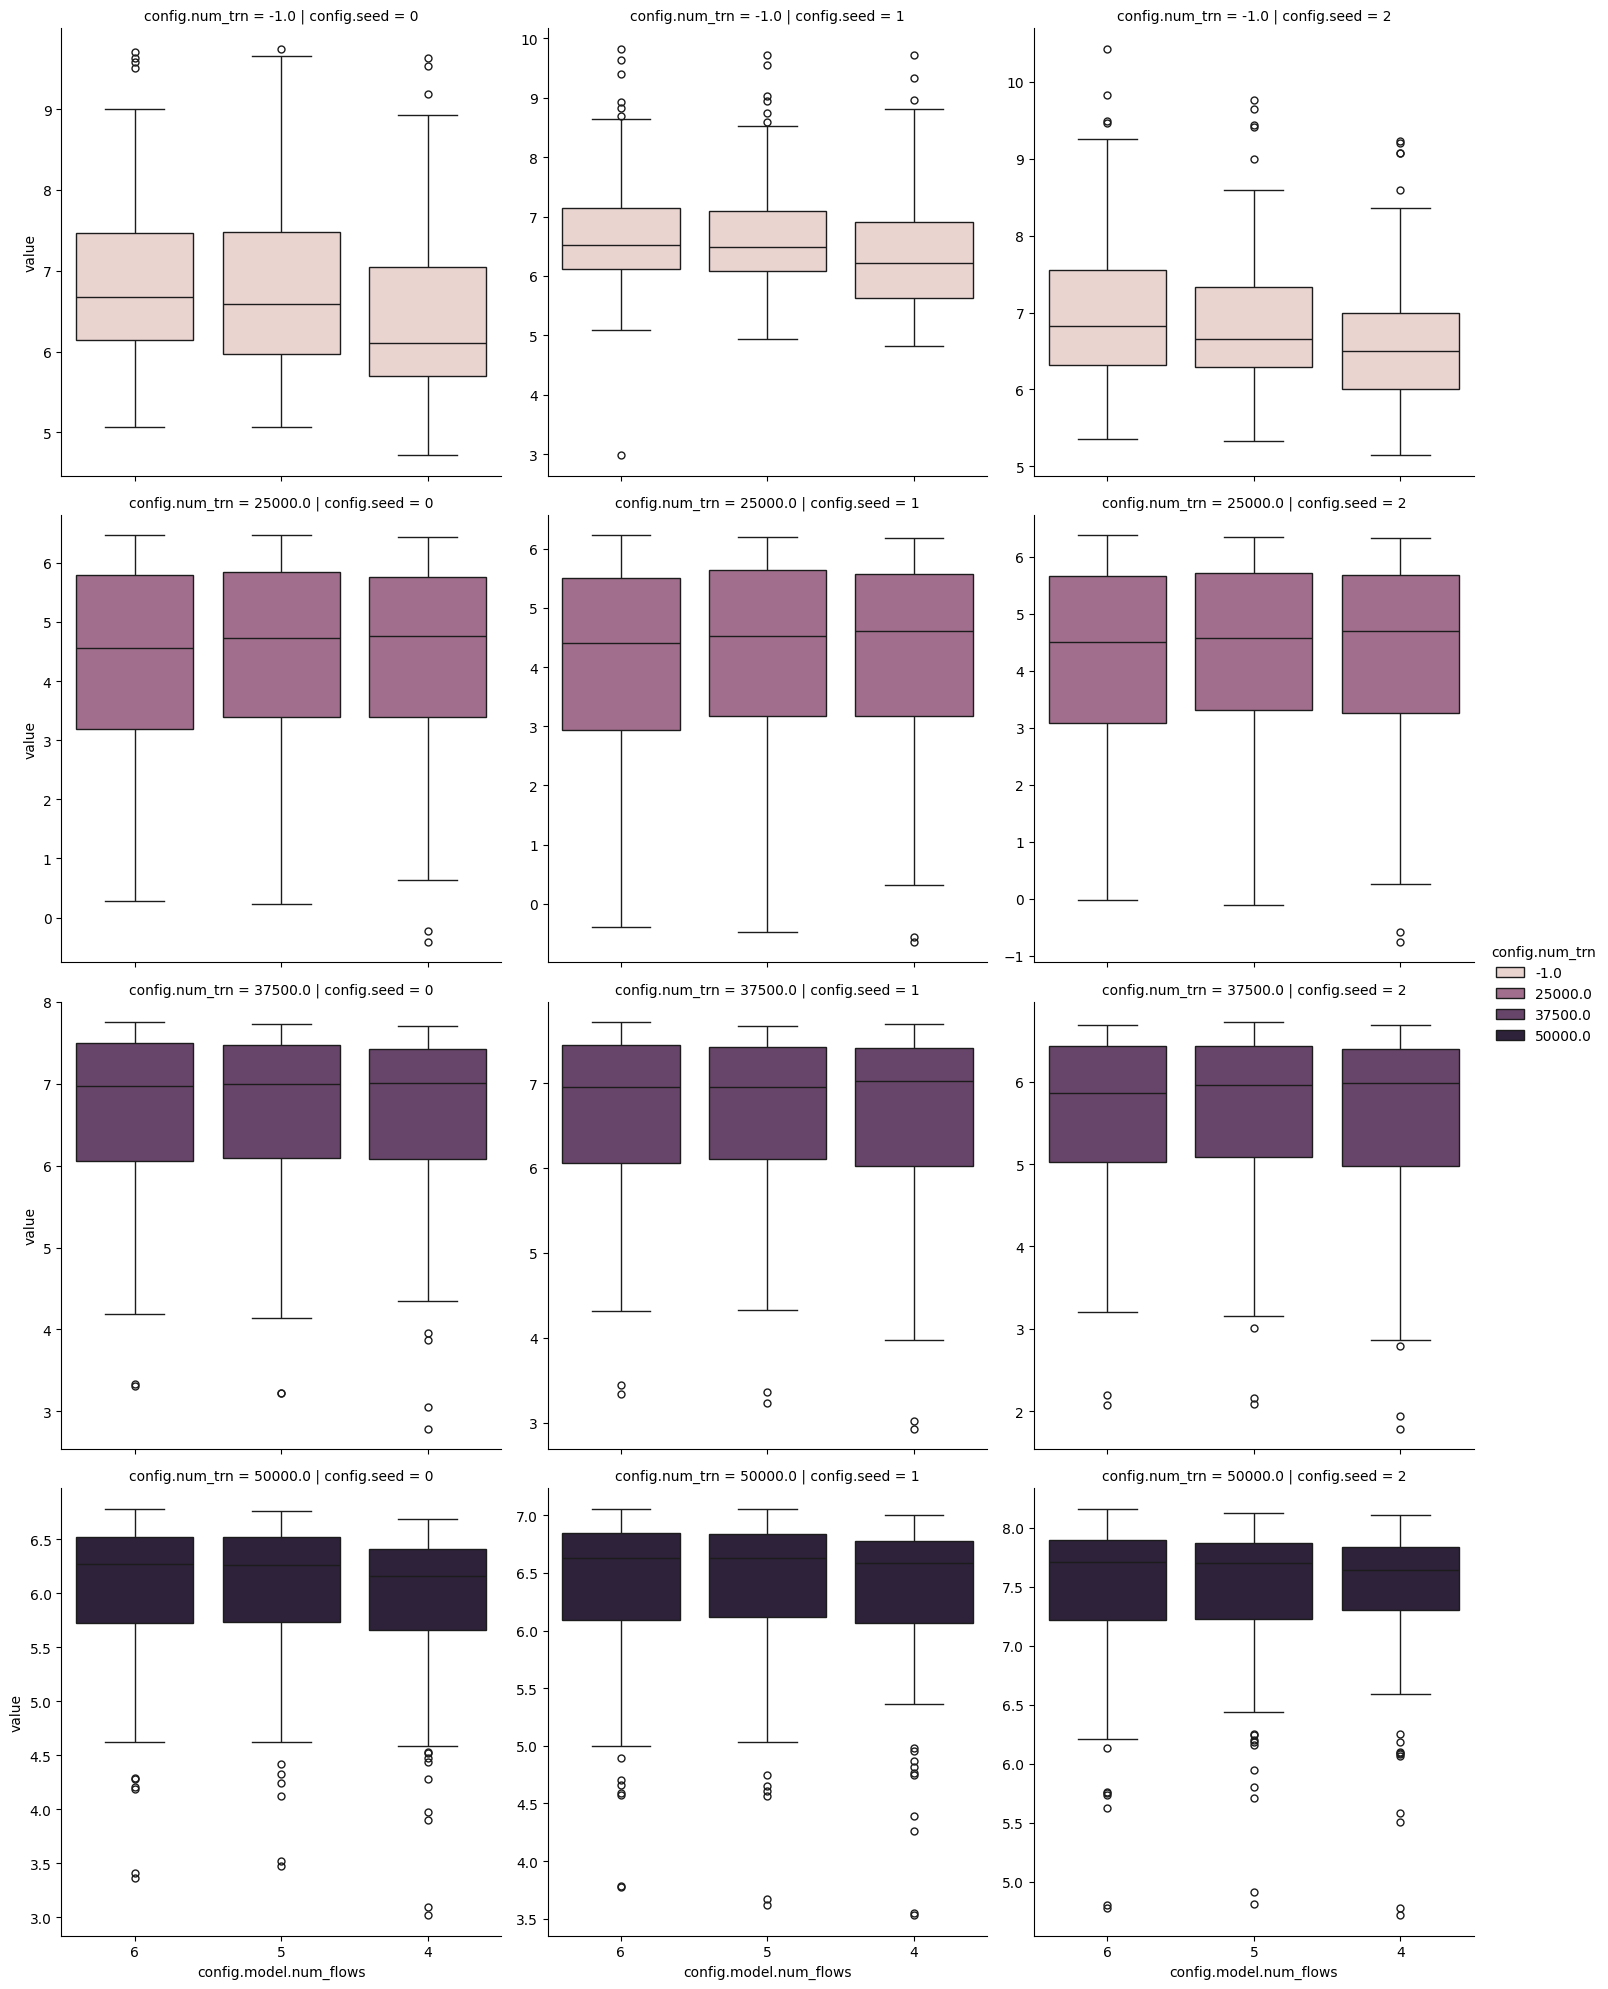

In [40]:
g = sns.catplot(
    data=df[df.metric == METRIC],
    x="config.model.num_flows",
    y="value",
    row="config.num_trn", hue='config.num_trn', col='config.seed',
    kind="box",
    sharex=True, sharey=False,
)

# g.set(yscale="log")

g

### steps

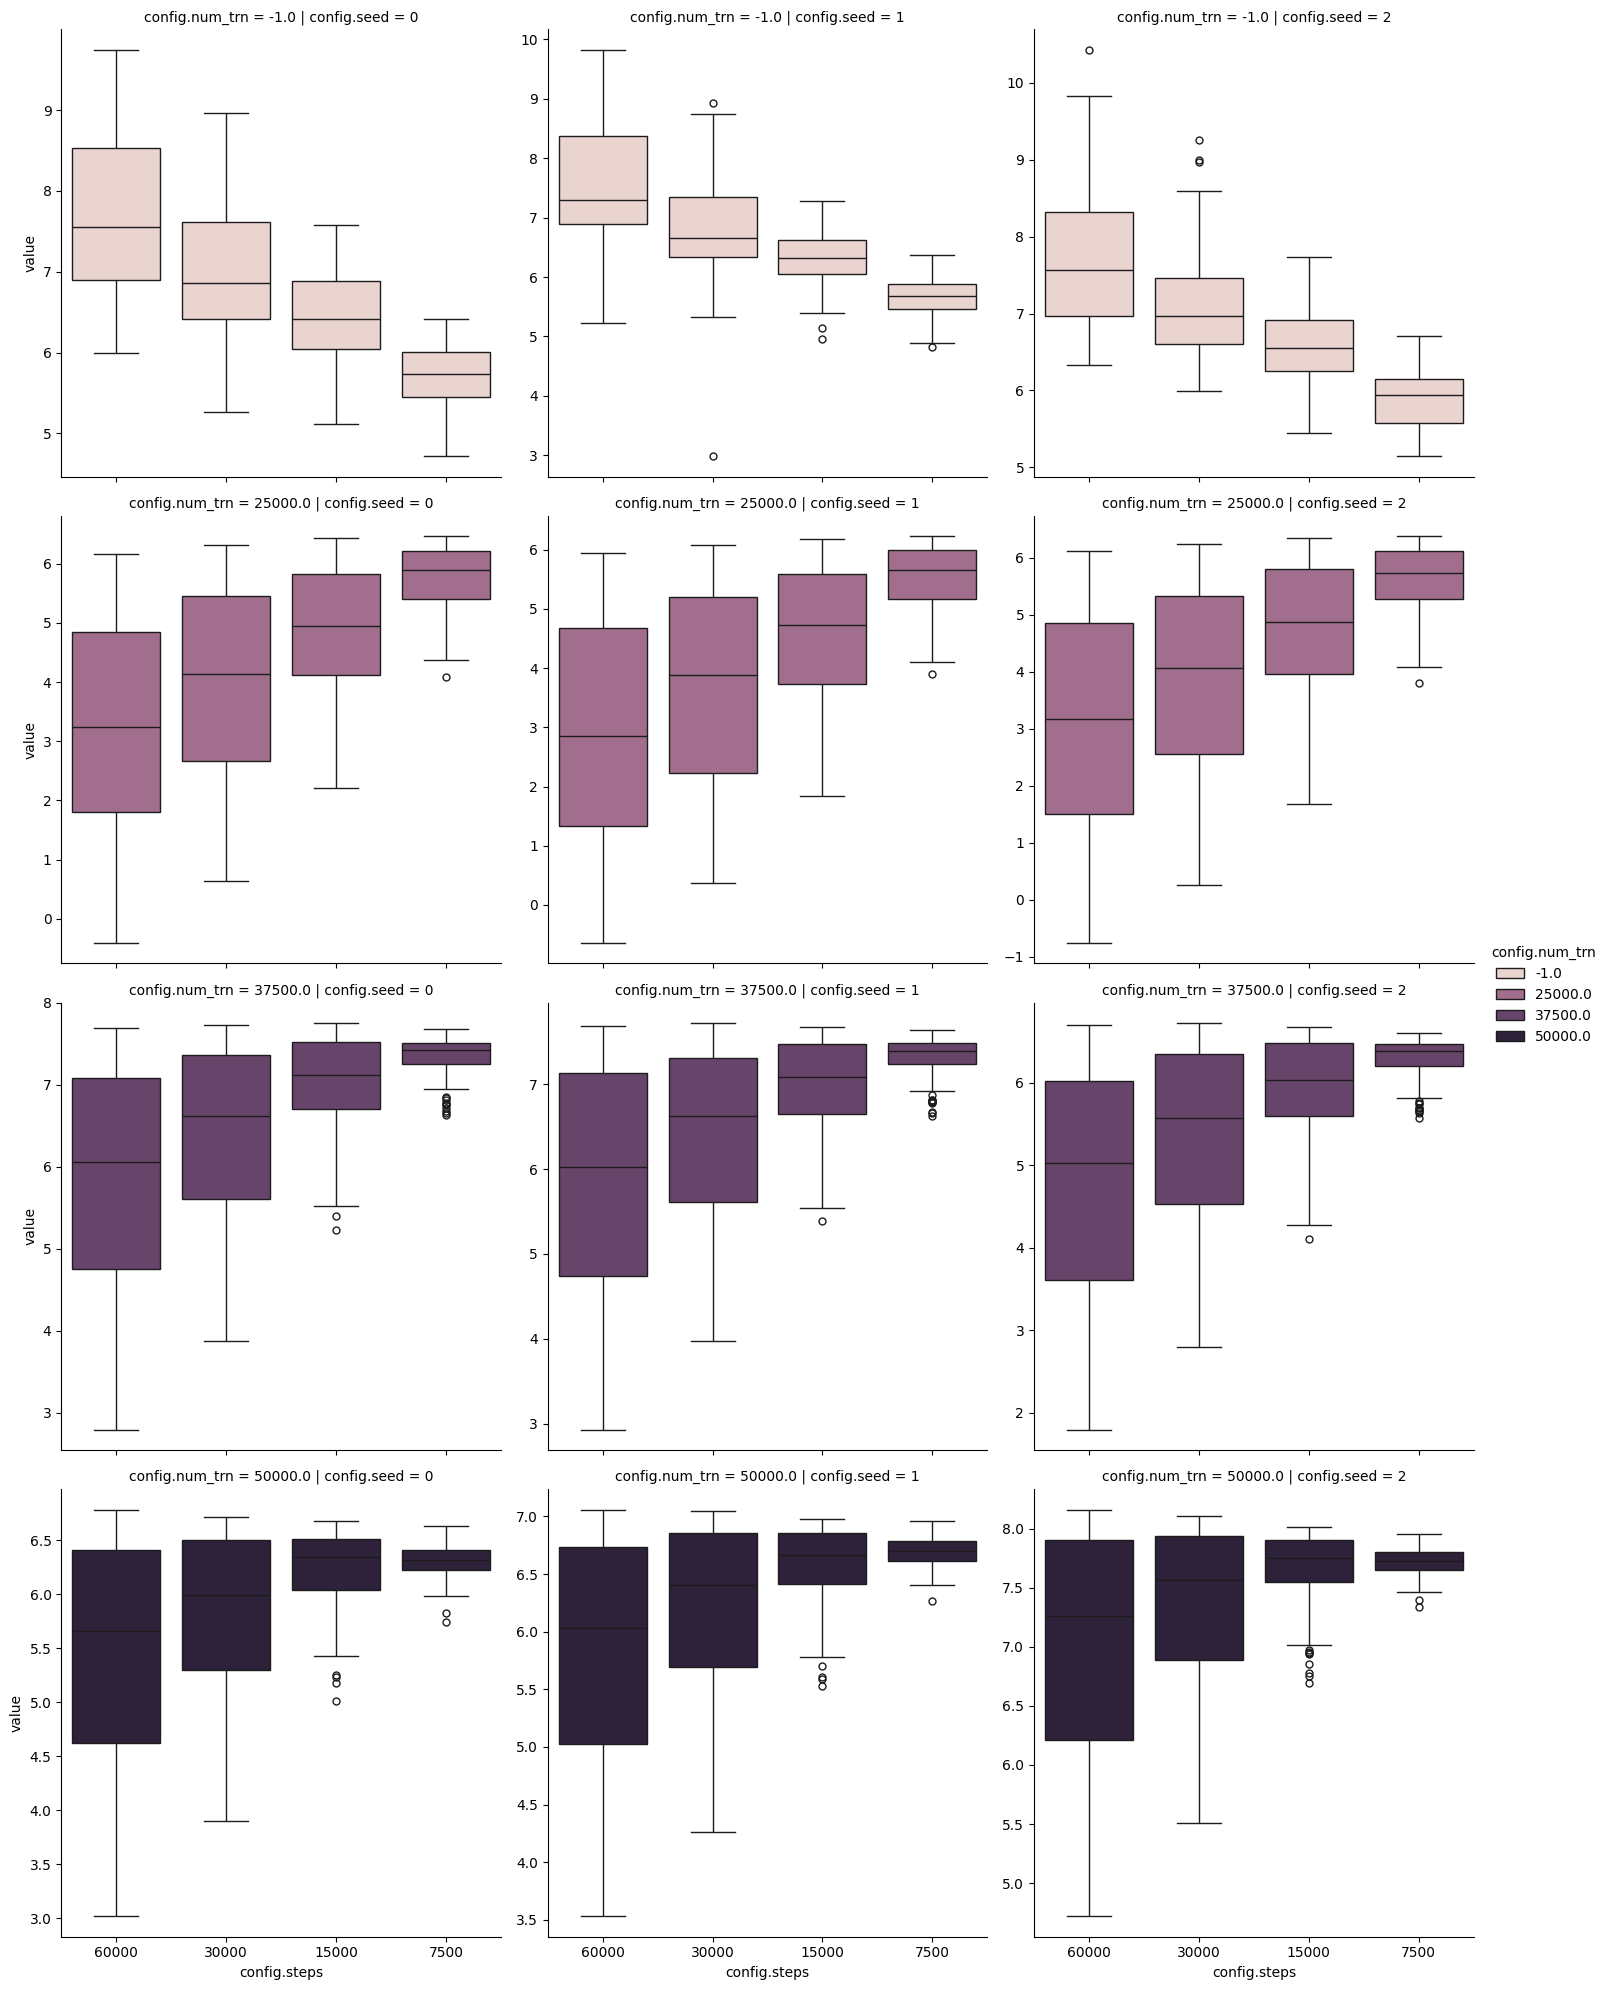

In [39]:
g = sns.catplot(
    data=df[df.metric == METRIC],
    x="config.steps",
    y="value",
    row="config.num_trn", hue='config.num_trn', col='config.seed',
    kind="box",
    sharex=True, sharey=False,
)

# g.set(yscale="log")

g